<h2>Calcolo della massima portata in un nodo</h2>
(E' necessario aver svolto le simulazioni per tutti i tempi di pioggia)

Si carica la libreria che consente di conoscere e scegliere la directory di lavoro

In [1]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\nodes'

Si interroga ora la lista dei file presenti nella nuova directory di lavoro. Se corretta sono presenti le cartelle relative alle simulazioni per ogni tempo di pioggia. (5mins, 10mins,...)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'csv',
 'desktop.ini',
 'n01_qmax.ipynb',
 'n02_qmax.ipynb',
 'n03_qmax.ipynb',
 'n04_qmax.ipynb',
 'n10_qmax.ipynb',
 'n11_qmax.ipynb',
 'n12_qmax.ipynb',
 'n13_qmax.ipynb',
 'n14_qmax.ipynb',
 'n15_qmax.ipynb',
 'n16_qmax.ipynb',
 'n17_qmax.ipynb',
 'n18_qmax.ipynb',
 'n19_qmax.ipynb',
 'n20_qmax.ipynb',
 'n21_qmax.ipynb',
 'n22_qmax.ipynb',
 'n24_qmax.ipynb',
 'n26_qmax.ipynb',
 'n29_qmax.ipynb']

In [3]:
os.chdir('csv')
os.listdir()

['n00.csv',
 'n01.csv',
 'n02.csv',
 'n03.csv',
 'n04.csv',
 'n05.csv',
 'n06.csv',
 'n07.csv',
 'n08.csv',
 'n09.csv',
 'n10.csv',
 'n11.csv',
 'n12.csv',
 'n13.csv',
 'n14.csv',
 'n15.csv',
 'n16.csv',
 'n17.csv',
 'n18.csv',
 'n19.csv',
 'n20.csv',
 'n21.csv',
 'n22.csv',
 'n23.csv',
 'n24.csv',
 'n25.csv',
 'n26.csv',
 'n27.csv',
 'n28.csv',
 'n29.csv']

Finalmente si importa la libreria "pandas"

In [4]:
from pandas import *
import pandas as pd
import datetime as datetime


Si legge il file csv del nodo contenente le portate nel tempo per i diversi tempi di pioggia, usando il comando di panda <code>read_csv</code>

In [5]:
pd.options.display.max_rows = 20
node = pd.read_csv('n02.csv')
map(datetime, node['time'])
node = node.set_index('time')
node

,5min,10min,15min,20min,25min
time,,,,,
00:00:30,0.004080,0.001774,0.001066,0.000732,0.000542
00:01:00,0.008616,0.003745,0.002250,0.001546,0.001144
00:01:30,0.016755,0.007655,0.004764,0.003372,0.002564
00:02:00,0.025661,0.011941,0.007522,0.005377,0.004123
00:02:30,0.034422,0.016516,0.010591,0.007672,0.005946
00:03:00,0.043883,0.021467,0.013917,0.010160,0.007924
00:03:30,0.051579,0.025872,0.017011,0.012542,0.009857
00:04:00,0.059840,0.030613,0.020346,0.015111,0.011945
00:04:30,0.065910,0.034436,0.023163,0.017348,0.013801


Finalmente visualizziamo i dati con matplotlib. Il secondo comando, preceduto da "%" consente di visualizzare automaticamente sullo schermo il risultato grafico. 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 

Si visualizzano le curve di portata rispetto all'andamento nel tempo per un controllo ulteriore

In [26]:
all=node[['5min','10min', '15min', '20min', '25min']]

[]

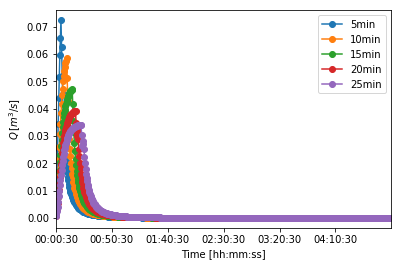

In [27]:
ax = all.plot(style="-o")
ax.set_xlabel('Time [hh:mm:ss]')
ax.set_ylabel(r'$Q\,\left[m^3/s\right]$')
ax.plot()

Si valuta il valore massimo di portata tra i massimi ottenuti per tempi diversi di pioggia e il relativo tempo critico

In [28]:
n_t1 = node['5min']
n_t2 = node['10min']
n_t3 = node['15min']
n_t4 = node['20min']
n_t5 = node['25min']

In [29]:
maxValues = [n_t1.max(), n_t2.max(), n_t3.max(), n_t4.max(), n_t5.max()]
maxValues

[0.0724, 0.058602999999999995, 0.04722, 0.039256, 0.034082999999999995]

Il valore massimo tra i tempi è $Q_{max}$ e vale

In [30]:
maxValue = max(maxValues)
maxValue

0.0724

cioè, in litri

In [31]:
maxValue * 1000

72.4

La sua posizione nel file dei massimi è:

In [15]:
maxValues.index(maxValue)

0

cioè è causata dalla precipitazione di **5min**.

Ora ci proponiamo di trovare il tempo in cui il massimo si realizza. Per fare questo dobbiamo considerare il primo dataFrame.

In [16]:
mask=(n_t1==n_t1.max())

In [17]:
n_t1==n_t1.max()

time
00:00:30    False
00:01:00    False
00:01:30    False
00:02:00    False
00:02:30    False
00:03:00    False
00:03:30    False
00:04:00    False
00:04:30    False
00:05:00     True
            ...  
04:55:30    False
04:56:00    False
04:56:30    False
04:57:00    False
04:57:30    False
04:58:00    False
04:58:30    False
04:59:00    False
04:59:30    False
05:00:00    False
Name: 5min, Length: 600, dtype: bool

In [18]:
n_t1[mask]

time
00:05:00    0.0724
Name: 5min, dtype: float64

Il tempo di pioggia critico risulta:

In [19]:
n_t1[mask].index

Index(['00:05:00'], dtype='object', name='time')

---